In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer
import pandas as pd
import csv
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates
import datetime
import random
import matplotlib.dates as mdates
from dateutil.parser import parse
from datetime import datetime
import re
from sklearn.preprocessing import KBinsDiscretizer
from pandas import DataFrame
import numpy as np
import matplotlib.patches as mpatches

In [2]:
# Setting up arrays for appending values
daily_yield = []
time = []
ac_power = []
dc_power = []

In [3]:
# Reading values
file=pd.read_csv('Plant_1_Generation_Data.csv')
array=np.array(file)

In [4]:
# Adding values
for i in range(len(array)):
    time.append(array[i][0])
    dc_power.append(array[i][3])
    ac_power.append(array[i][4])
    daily_yield.append(array[i][5])

In [5]:
# Converting time to seconds
time_toordinal=[]
date_one = '15-05-2020 00:00'
my_date = datetime.strptime(str(parse(date_one)), "%Y-%m-%d %H:%M:%S")
for y in time:
    if(re.search("/",y)):
        buffer=parse(y)
        buffer_change=datetime.strptime(str(buffer),"%Y-%d-%m %H:%M:%S")

    else:
        buffer=parse(y)
        buffer_change=datetime.strptime(str(buffer),"%Y-%m-%d %H:%M:%S")
        
    difference = buffer_change - my_date
    time_toordinal.append(difference.total_seconds())

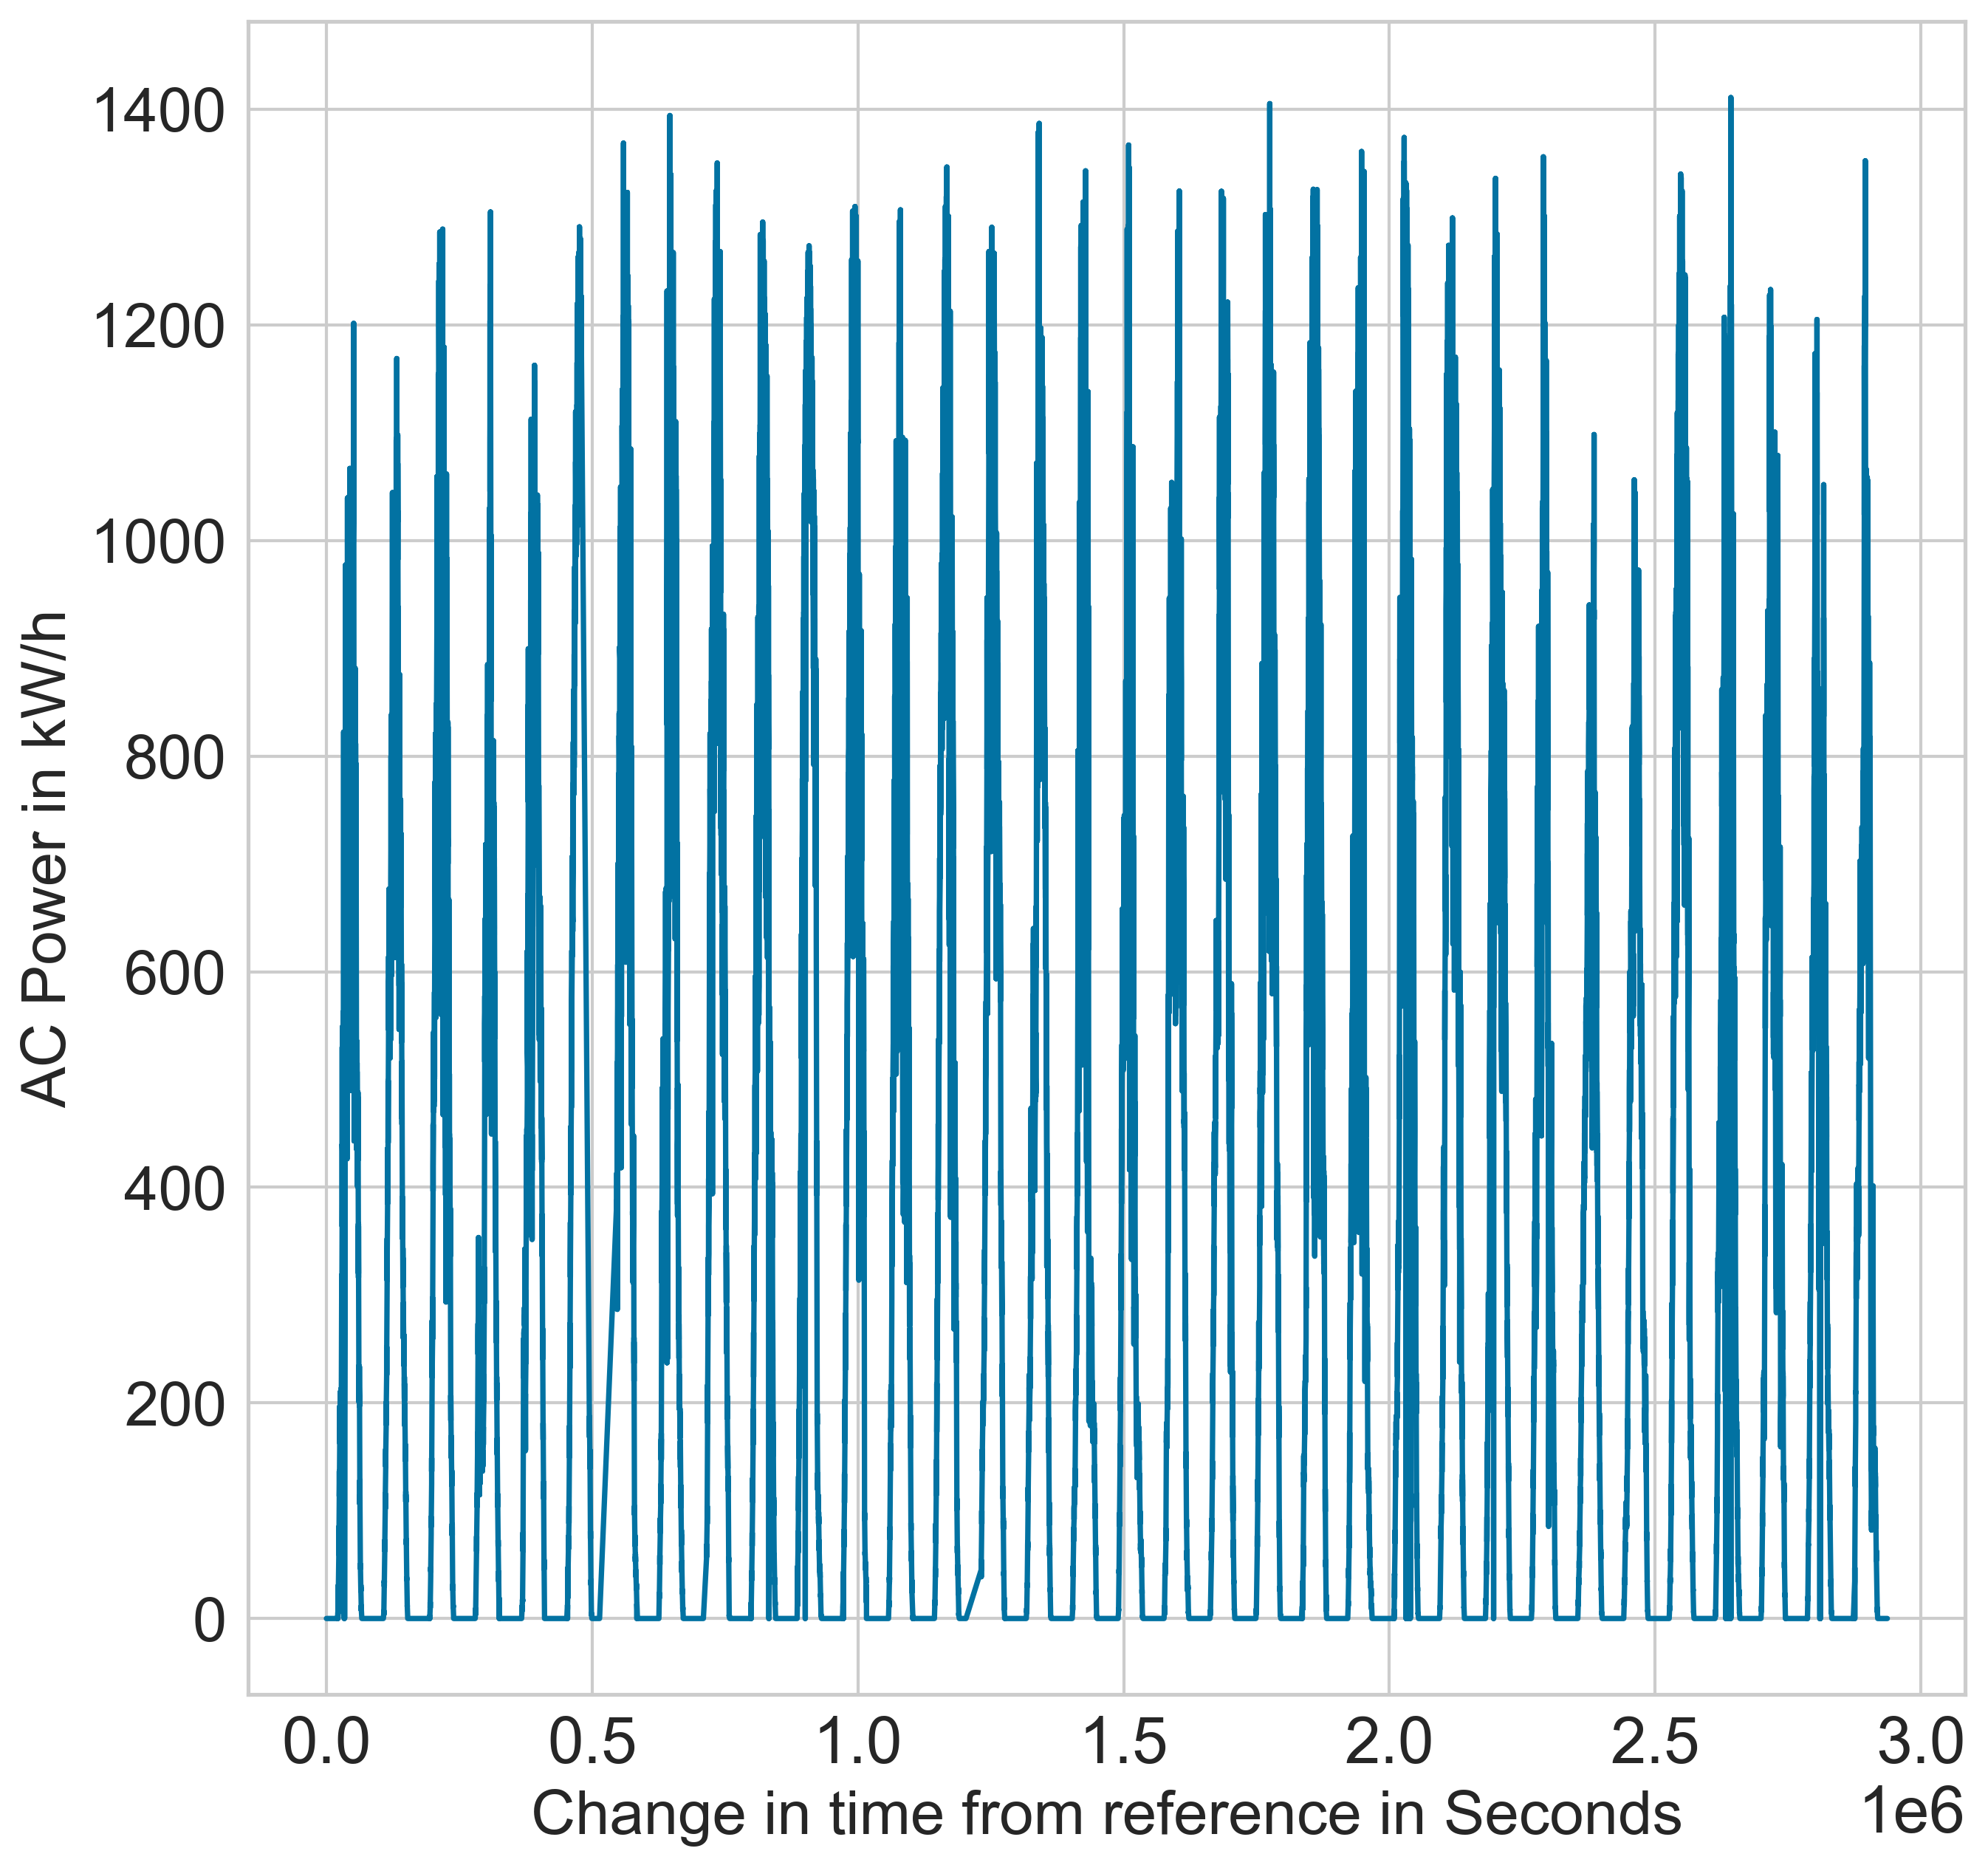

In [14]:
# Plotting
plt.figure(dpi=300,figsize=(10,10))
plt.plot(time_toordinal,ac_power)
plt.ylabel('AC Power in kW/h',fontsize=20)
plt.xlabel('Change in time from reference in Seconds',fontsize=20)
matplotlib.rc('xtick', labelsize=22) 
matplotlib.rc('ytick', labelsize=22) 
plt.savefig('Image')
plt.show()

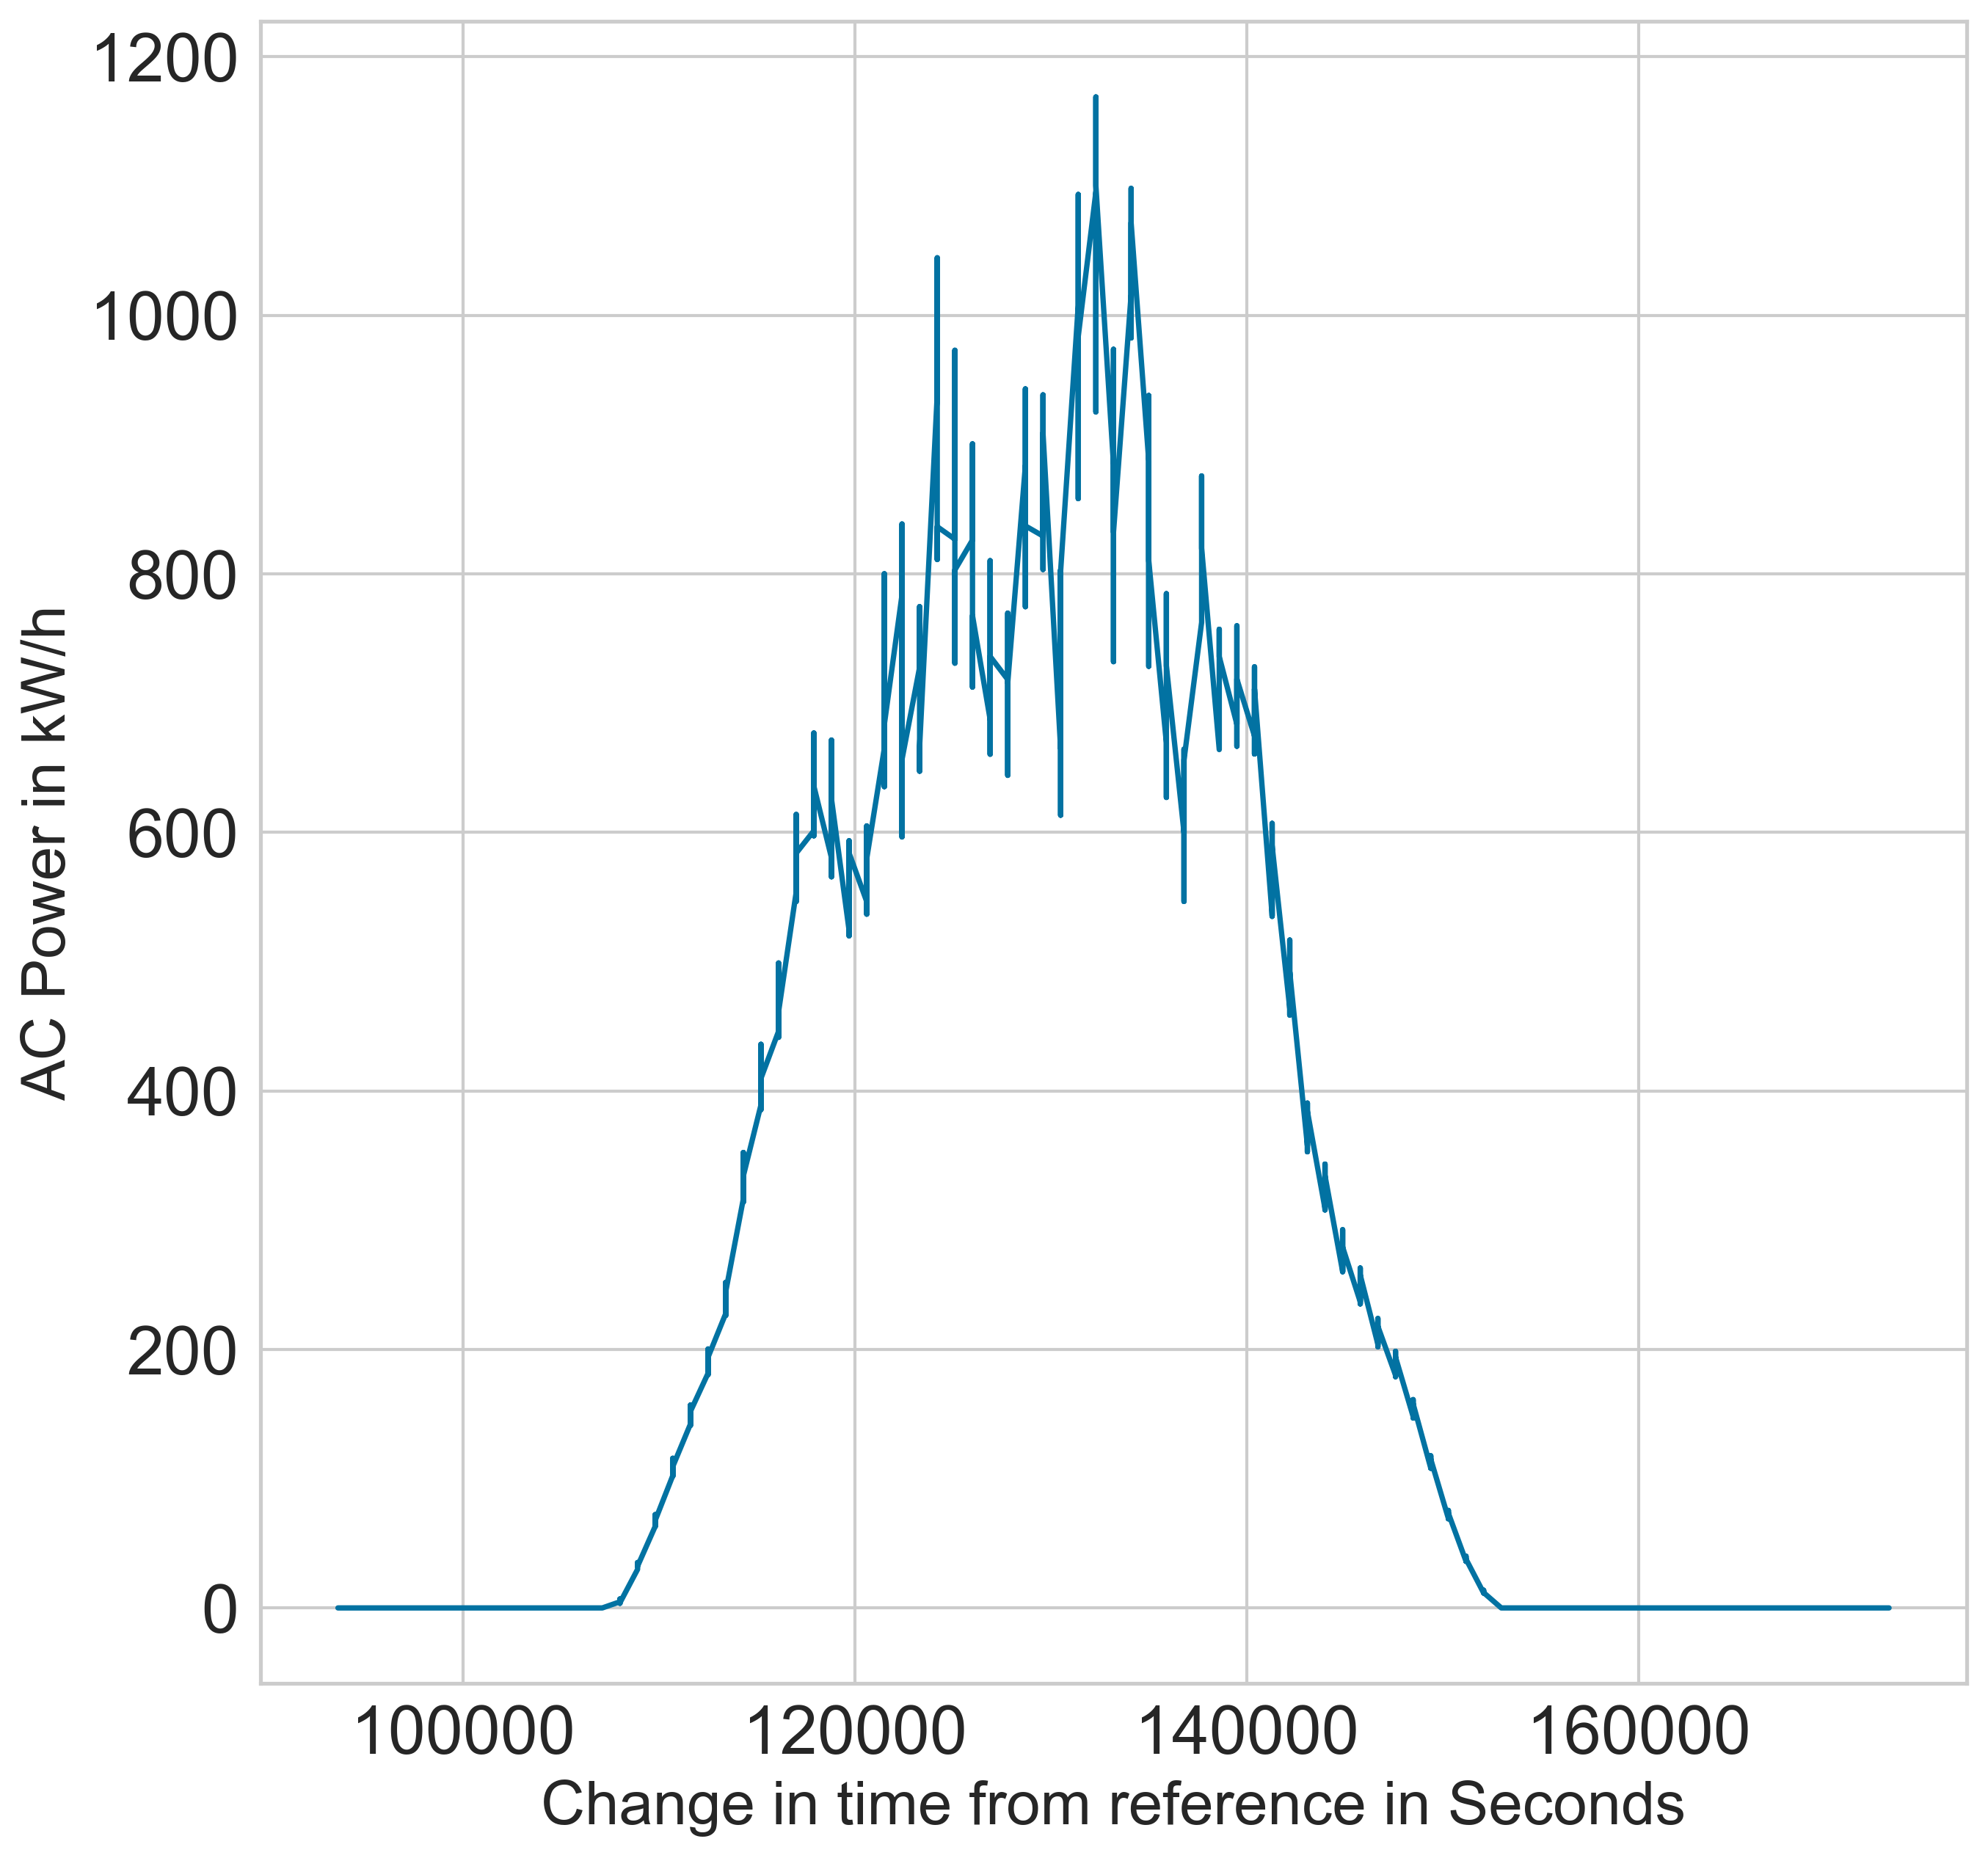

In [19]:
# Plotting
plt.figure(dpi=300,figsize=(10,10))
plt.ylabel('AC Power in kW/h',fontsize=20)
plt.xlabel('Change in time from reference in Seconds',fontsize=20)
matplotlib.rc('xtick', labelsize=22) 
matplotlib.rc('ytick', labelsize=22) 
plt.plot(time_toordinal[1956:3889],ac_power[1956:3889])   # Picking up a clean chunk of data
plt.savefig('Chunk')

In [8]:
# Appending values
array=[]
for add in range(len(time_toordinal)):
    if add>=1956 and add<=3889:
        array.append([time_toordinal[add],ac_power[add]])
    else:
        continue

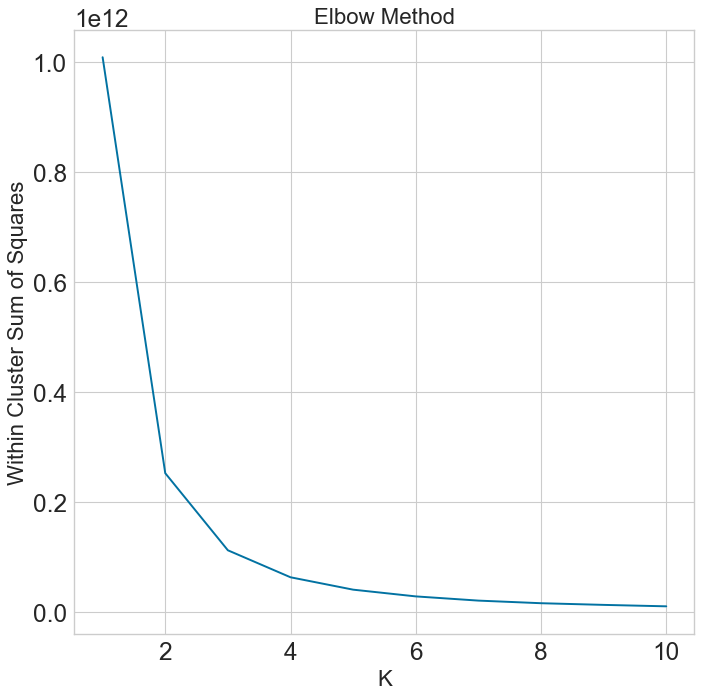

In [16]:
# Elbow plotting
wcss = []
plt.figure(dpi=80,figsize=(10,10))
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit((array))
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method',fontsize=20)
plt.xlabel('K',fontsize=20)
plt.ylabel('Within Cluster Sum of Squares',fontsize=20)
matplotlib.rc('xtick', labelsize=22) 
matplotlib.rc('ytick', labelsize=22) 
plt.savefig('Elbow Method')
plt.show()

In [10]:
#CONVERTING TO NUMPY ARRAY
array=np.array(array)

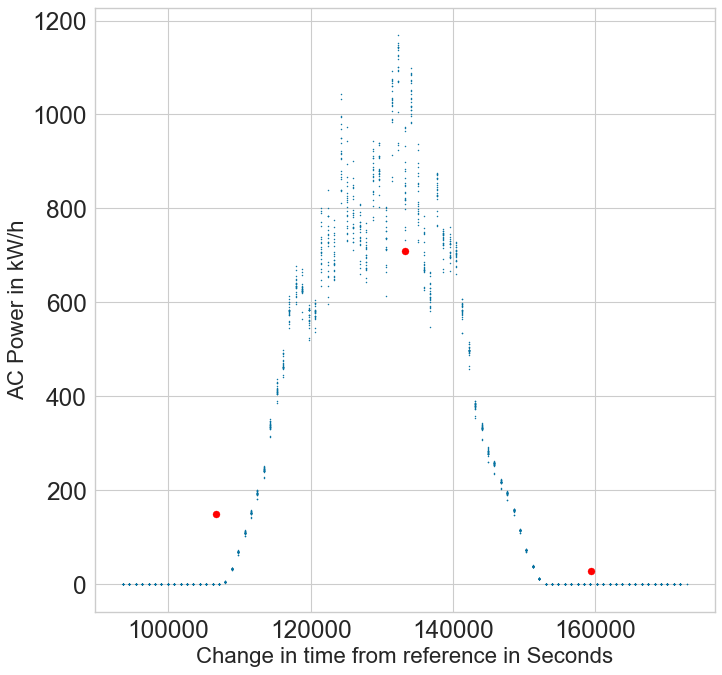

In [17]:
# Applying k means
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict((array))
plt.figure(dpi=80,figsize=(10, 10))
plt.scatter(array[:,0], array[:,1],s=1)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=40, c='red')
matplotlib.rc('xtick', labelsize=22) 
matplotlib.rc('ytick', labelsize=22) 
plt.ylabel('AC Power in kW/h',fontsize=20)
plt.xlabel('Change in time from reference in Seconds',fontsize=20)
#plt.savefig('K_Means_Centroids')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


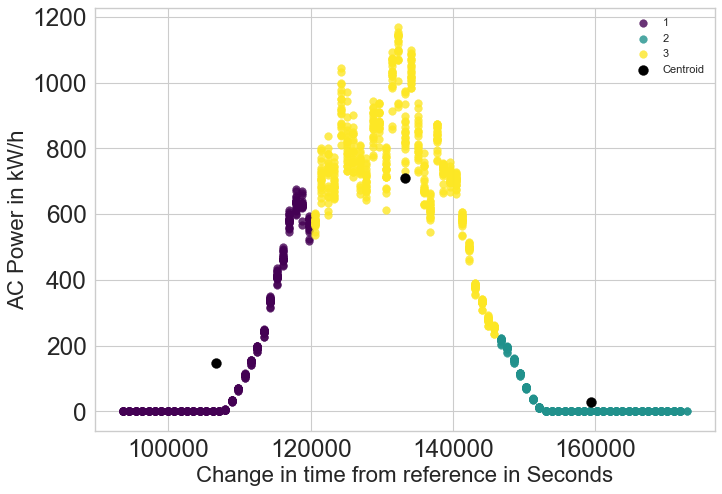

In [20]:
# Clustering and centroids 
labels = kmeans.predict(array)

fig=plt.figure(dpi=80,figsize=(10,7))
ax = fig.add_subplot(111)
ColorsA=plt.cm.viridis(np.linspace(0, 1,3),alpha=0.8) #Equally spaced color 
for i in range(3): #Labels of the clusters 
    xL=[]
    yL=[]
    for k in range(len(array)):
        if labels[k]==i: #Data points of each cluster 
            xL.append(array[k,0])
            yL.append(array[k,1])
       
    ax.scatter(xL,yL,c=ColorsA[i])

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=80, c='Black')    
matplotlib.rc('xtick', labelsize=22) 
matplotlib.rc('ytick', labelsize=22)    
plt.ylabel('AC Power in kW/h',fontsize=20)
plt.xlabel('Change in time from reference in Seconds',fontsize=20)
target = [1,2,3,'Centroid']
ax.legend(target)
plt.savefig('K_Means_Clustering')    

In [13]:
centroids = kmeans.cluster_centers_
print("Centroid clusters are:")
print(centroids)

Centroid clusters are:
[[1.06729573e+05 1.48687138e+02]
 [1.59342187e+05 2.76327204e+01]
 [1.33200000e+05 7.10244699e+02]]
